In [1]:
from preamble import *
%matplotlib notebook

# German Credit Card Fraud

In [2]:
data = pd.read_csv("data/german_cc_fraud.csv")

In [3]:
data['class'].value_counts()

good    700
bad     300
Name: class, dtype: int64

In [4]:
data.head()

,over_draft,credit_usage,credit_history,purpose,current_balance,Average_Credit_Balance,employment,location,personal_status,other_parties,...,property_magnitude,cc_age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,False,False,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,False,False,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,False,False,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,False,False,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,False,False,bad


In [5]:
data_dummies = pd.get_dummies(data.drop("class", axis=1))

In [6]:
data_dummies.columns

Index(['credit_usage', 'current_balance', 'location', 'residence_since',
       'cc_age', 'existing_credits', 'num_dependents', 'own_telephone',
       'foreign_worker', 'over_draft_0<=X<200', 'over_draft_<0',
       'over_draft_>=200', 'over_draft_no checking', 'credit_history_all paid',
       'credit_history_critical/other existing credit',
       'credit_history_delayed previously', 'credit_history_existing paid',
       'credit_history_no credits/all paid', 'purpose_domestic appliance',
       'purpose_education', 'purpose_furniture/equipment', 'purpose_new car',
       'purpose_other', 'purpose_radio/tv', 'purpose_repairs',
       'purpose_retraining', 'purpose_used car', 'purpose_usiness',
       'Average_Credit_Balance_100<=X<500',
       'Average_Credit_Balance_500<=X<1000', 'Average_Credit_Balance_<100',
       'Average_Credit_Balance_>=1000',
       'Average_Credit_Balance_no known savings', 'employment_1<=X<4',
       'employment_4<=X<7', 'employment_<1', 'employment_>=7',


In [7]:
X = data_dummies.values.astype(np.float)

In [11]:
X.shape

(1000, 59)

# Elliptic Envelope

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.covariance import EllipticEnvelope

In [9]:
X_scaled = StandardScaler().fit_transform(X)
pca = PCA(n_components=.8)
X_preprocessed = pca.fit_transform(X_scaled)

In [10]:
pca.n_components_

30

In [12]:
ee = EllipticEnvelope(contamination=.3).fit(X_preprocessed)

In [15]:
np.bincount(ee.predict(X_preprocessed) + 1)

array([300,   0, 700])

In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix(data['class'] == "good", ee.predict(X_preprocessed) == 1)

array([[100, 200],
       [200, 500]])

In [17]:
from sklearn.metrics import roc_auc_score
roc_auc_score(data['class'] == "good", ee.decision_function(X_preprocessed))

0.55953809523809528

# PCA

<IPython.core.display.Javascript object>


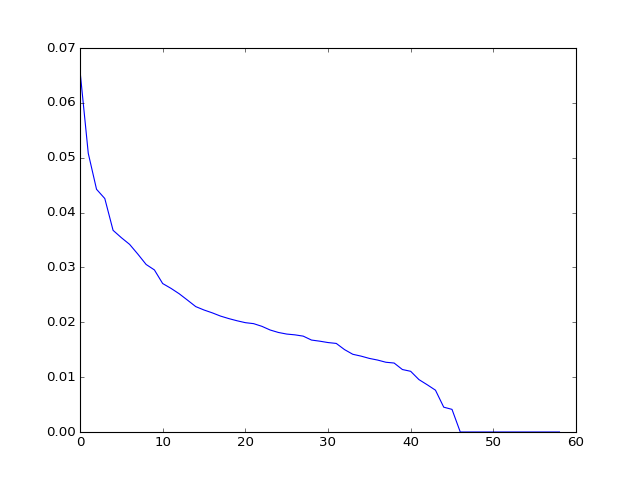

In [19]:
pca_full = PCA().fit(X_scaled)
plt.figure()
plt.plot(pca_full.explained_variance_ratio_)

In [16]:
roc_auc_score(data['class'] == "good", pca.score_samples(X_scaled))

0.59285714285714286

# Robust PCA

In [20]:
from robust_pca import RobustPCA
rpca = RobustPCA().fit(X_scaled)

In [21]:
roc_auc_score(data['class'] == "good", rpca.score_samples(X_scaled))

0.56573809523809526

# KDE

In [22]:
from sklearn.neighbors import KernelDensity

In [23]:
kde = KernelDensity(bandwidth=5).fit(X_scaled)


<IPython.core.display.Javascript object>


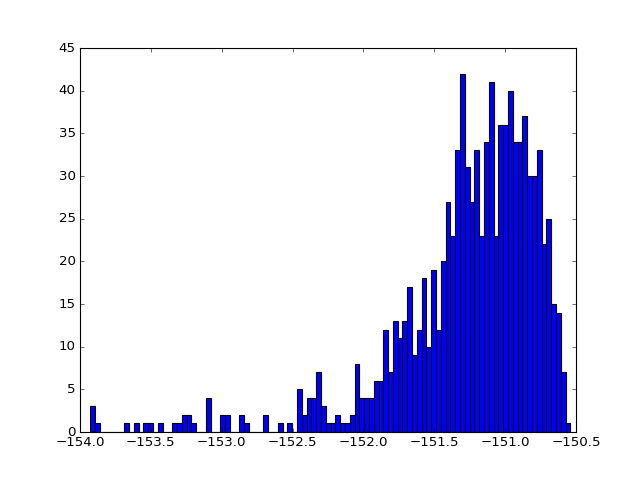

In [24]:
plt.figure()
plt.hist(kde.score_samples(X_scaled), bins=100);

In [25]:
roc_auc_score(data['class'] == "good", kde.score_samples(X_scaled))

0.58804761904761904

# Isolation Forest

In [26]:
from sklearn.ensemble import IsolationForest
iso = IsolationForest(contamination=.3).fit(data_dummies.values)

In [27]:
from sklearn.metrics import confusion_matrix, roc_auc_score
confusion_matrix(data['class'] == "good", iso.predict(data_dummies.values) == 1)

array([[122, 178],
       [178, 522]])

In [28]:
roc_auc_score(data['class'] == "good", iso.decision_function(data_dummies.values))

0.59531428571428568

# Exercise

Apply the above techniques to the Adult dataset (the rich people are the outliers).